# Dataset

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import sys
import os
import datetime

import altair as alt
alt.renderers.enable('notebook')

from PIL import Image

from dotenv import load_dotenv

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sys.path.append("../Library/")
import deep_learning as dl
import image_manipulation as ima
import machine_learning as ml

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
categories = ["forest-woodland", "agriculture", "shrubland-grassland", "semi-desert"]
labels = [0, 1, 2]

def dataset_details(base_folder):
    
    df_images = pd.DataFrame(columns = ['filename', 'image', 'resolution', 'label', 'category'])
    for category in categories:
        for label in labels:
            df = ima.load_images_into_df_by_category_and_label(base_folder, category, label)
            df_images = df_images.append(df)    

    df_images_counts = df_images.groupby(['category', 'label']).size().reset_index(name='counts')
    print("Number of images:", df_images.shape[0])
    print("Distribution of categories and labels:\n", df_images_counts)
    print("\nDistribution of labels:\n", df_images.groupby(['label']).size().reset_index(name='counts'))
    
    # fill missing category-label pairs
    #for category in categories:
    #    for label in labels:
    #        mask = (df_images_counts.category == category) & (df_images_counts.label == label)
    #        if len(df_images_counts[mask]["n_images"].values) == 0:
    #            df_images_counts.loc[df_images_counts.shape[0]] = [category,label,0]
                
    alt_chart = alt.Chart(df_images_counts, width=200).mark_bar().encode(
        x='label:N',
        y='counts:Q',
        color='category:N'
    )
    return alt_chart

## 0.3m

Number of images: 2220
Distribution of categories and labels:
                category  label  counts
0           agriculture      0       1
1           agriculture      1       1
2           agriculture      2     417
3       forest-woodland      0     335
4       forest-woodland      1      44
5       forest-woodland      2     107
6           semi-desert      0     304
7           semi-desert      1      67
8           semi-desert      2     231
9   shrubland-grassland      0     415
10  shrubland-grassland      1      84
11  shrubland-grassland      2     214

Distribution of labels:
    label  counts
0      0    1055
1      1     196
2      2     969


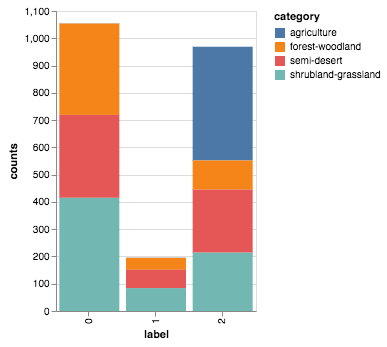

In [4]:
base_folder = os.getenv('GDRIVE_FOLDER') + "MFP - Satellogic/images/usgs_512_res0.3m"
dataset_details(base_folder)

## 1m

Number of images: 1366
Distribution of categories and labels:
                category  label  counts
0           agriculture      0       4
1           agriculture      1       2
2           agriculture      2     134
3       forest-woodland      0     241
4       forest-woodland      1      39
5       forest-woodland      2     175
6           semi-desert      0     248
7           semi-desert      1      13
8           semi-desert      2     169
9   shrubland-grassland      0     174
10  shrubland-grassland      2     167

Distribution of labels:
    label  counts
0      0     667
1      1      54
2      2     645


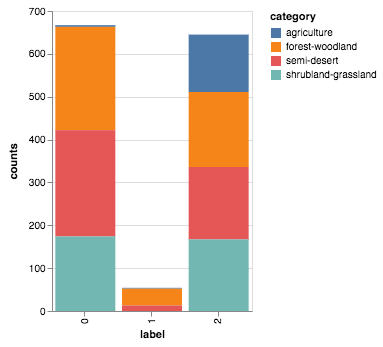

In [5]:
base_folder = os.getenv('GDRIVE_FOLDER') + "MFP - Satellogic/images/usgs_512_res1m"
dataset_details(base_folder)